In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [34]:
train = pd.read_csv('rain.csv')
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,k1,"['Romance', 'Drama']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,k2,"['Comedy', 'Romance']",0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,k3,"['Action','Drama']",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,k4,"['Action', 'Romance']",1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,k5,"['Action', 'Drama']",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [36]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Movie_Poster_data_by_me/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.26it/s]


In [37]:
X.shape

(50, 400, 400, 3)

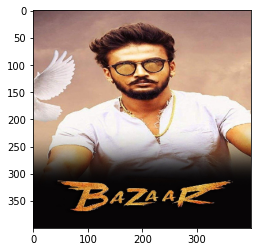

In [38]:
plt.imshow(X[40])

In [39]:
train['Genre'][22]

"['Drama', 'Horror']"

In [40]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(50, 25)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [50]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(25, activation='sigmoid'))

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [59]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
2/2 [==============================] - 4s 2s/step - loss: 0.1677 - acc: 0.5750 - val_loss: 0.2083 - val_acc: 0.5000
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.1691 - acc: 0.5750 - val_loss: 0.2035 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.1656 - acc: 0.5750 - val_loss: 0.2009 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 0.1620 - acc: 0.5750 - val_loss: 0.1989 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.1573 - acc: 0.5750 - val_loss: 0.1888 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 0.1591 - acc: 0.5750 - val_loss: 0.1857 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 4s 2s/step - loss: 0.1548 - acc: 0.5750 - val_loss: 0.1928 - val_acc: 0.5000
Epoch 8/10
2/2 [==============================] - 4s 2s/step - loss: 0.1522 - acc: 0.5750 - val_loss: 0.1992 - 

In [92]:
model.save('MG.h5')

In [93]:
img = image.load_img('1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Action (0.423)
Drama (0.269)
Romance (0.269)


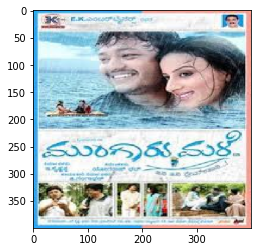

In [94]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-5:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)